Collected 8 links for Artificial intelligence
Collected 8 links for Machine learning
Collected 2 links for Neural network
Collected 8 links for Deep learning
Collected 5 links for Natural language processing
Collected 8 links for Reinforcement learning
Collected 4 links for Computer vision
Collected 3 links for Supervised learning
Collected 5 links for Unsupervised learning
Collected 7 links for Generative adversarial network
Top 3 by In-Degree Centrality:
[('Machine learning', 1.0), ('Artificial intelligence', 0.7777777777777777), ('Deep learning', 0.7777777777777777)]

Top 3 by Betweenness Centrality:
[('Machine learning', 0.14050925925925925), ('Generative adversarial network', 0.11458333333333333), ('Artificial intelligence', 0.08958333333333333)]

Top 3 by PageRank:
[('Machine learning', 0.1571398733530773), ('Unsupervised learning', 0.12176690455299498), ('Deep learning', 0.11893301871118883)]


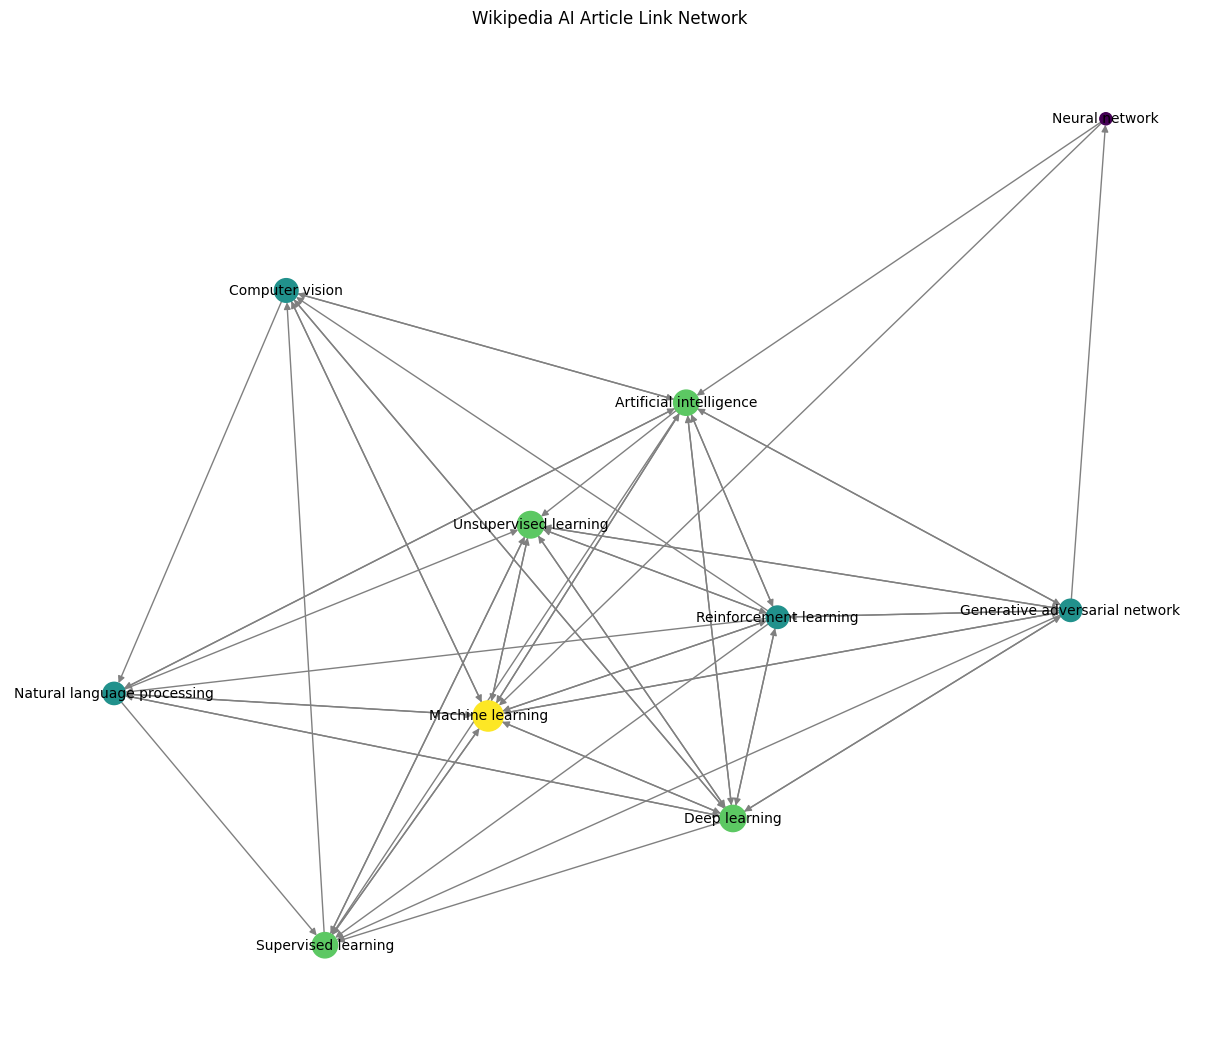

In [1]:
# Imports
import requests
import time
import networkx as nx
import matplotlib.pyplot as plt

# Function to get internal links from a Wikipedia article
def get_links(title):
    S = requests.Session()
    URL = "https://en.wikipedia.org/w/api.php"
    PARAMS = {
        "action": "query",
        "titles": title,
        "prop": "links",
        "pllimit": "max",
        "format": "json"
    }

    links = []
    while True:
        response = S.get(url=URL, params=PARAMS)
        data = response.json()
        pages = data['query']['pages']
        for key in pages:
            if 'links' in pages[key]:
                links.extend([link['title'] for link in pages[key]['links']])
        if 'continue' in data:
            PARAMS.update(data['continue'])
        else:
            break
        time.sleep(0.5)  # to respect rate limits
    return links

# Seed articles within the "Artificial Intelligence" topic
seed_articles = [
    "Artificial intelligence",
    "Machine learning",
    "Neural network",
    "Deep learning",
    "Natural language processing",
    "Reinforcement learning",
    "Computer vision",
    "Supervised learning",
    "Unsupervised learning",
    "Generative adversarial network"
]

# Collect links between articles
collected_links = {}
for article in seed_articles:
    try:
        links = get_links(article)
        # Only keep links within the seed list to limit the graph scope
        filtered_links = [link for link in links if link in seed_articles]
        collected_links[article] = filtered_links
        print(f"Collected {len(filtered_links)} links for {article}")
    except Exception as e:
        print(f"Failed to collect for {article}: {e}")

# Create directed graph
G = nx.DiGraph()
for source, targets in collected_links.items():
    for target in targets:
        G.add_edge(source, target)

# Centrality Measures
in_deg = nx.in_degree_centrality(G)
btw = nx.betweenness_centrality(G)
pr = nx.pagerank(G)

# Display Top 3 Nodes by Each Metric
print("Top 3 by In-Degree Centrality:")
print(sorted(in_deg.items(), key=lambda x: x[1], reverse=True)[:3])

print("\nTop 3 by Betweenness Centrality:")
print(sorted(btw.items(), key=lambda x: x[1], reverse=True)[:3])

print("\nTop 3 by PageRank:")
print(sorted(pr.items(), key=lambda x: x[1], reverse=True)[:3])

# Network Visualization
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)
node_size = [pr[node] * 3000 for node in G.nodes()]
node_color = [in_deg[node] for node in G.nodes()]
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_size,
    node_color=node_color,
    cmap=plt.cm.viridis,
    edge_color='gray',
    font_size=10
)
plt.title("Wikipedia AI Article Link Network")
plt.show()
